<a href="https://colab.research.google.com/github/EbaraKoji/RL_sandbox/blob/master/q_learning_frozen_lake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
ENV_NAME = "FrozenLake-v0"
env = gym.make(ENV_NAME)

In [3]:
obs = env.reset()
print(obs)

0


In [4]:
obs, reward, done, info = env.step(1)
print(obs, reward, done, info)

0 0.0 False {'prob': 0.3333333333333333}


In [5]:
while done is False:
    obs, reward, done, info = env.step(1)
    print(obs, reward, done, info)

0 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
5 0.0 True {'prob': 0.3333333333333333}


In [6]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


In [7]:
obs = env.reset()
done = False
while done is False:
    obs, reward, done, info = env.step(1)
    env.render()
    print(obs, reward, done, info)
    print('\n')

  (Down)
SFFF
FHFH
FFFH
HFFG
4 0.0 False {'prob': 0.3333333333333333}


  (Down)
SFFF
FHFH
FFFH
HFFG
5 0.0 True {'prob': 0.3333333333333333}




In [8]:
class QTable():
    def __init__(self, row, col, initial_table=None):
        self.obs_count = row
        self.action_acount = col
        self.table = np.zeros((row, col)) if initial_table is None else initial_table
    
    def get_action(self, obs, epsilon=0):
        if np.random.rand() < epsilon:
            return np.random.randint(self.action_acount)
        else:
            return np.argmax(self.table[obs])
    
    def get_max_q_value(self, obs):
        return np.max(self.table[obs])
    
    def update_q_value(self, obs, action, reward, next_obs, done, gamma, alpha):
        old_q = self.table[obs, action]
        target_q = reward + gamma * self.get_max_q_value(next_obs) * int(not done)
        delta_q = target_q - old_q
        new_q = old_q + alpha * delta_q
        
        self.table[obs, action] = new_q

In [9]:
MAZE_SIZE = 8  # 4 or 8
OBS_COUNT = MAZE_SIZE ** 2
ACTION_COUNT = 4
MAP_NAME = f"{MAZE_SIZE}x{MAZE_SIZE}"

env = gym.make(ENV_NAME, map_name=MAP_NAME, is_slippery=True)

ALPHA = 0.1
GAMMA = 0.99
EPSILON_MAX = 0.99
EPSILON_MIN = 0.01
EPSILON_DECAY = 0.99
EPISODE_COUNT = 30000

initial_table = np.ones((OBS_COUNT, ACTION_COUNT))
q_table = QTable(row=OBS_COUNT, col=ACTION_COUNT, initial_table=initial_table)

In [10]:
epsilon = EPSILON_MAX

episode_rewards = []
MEAN_COUNT = 100
mean_rewards = np.array([])

for _ in range(EPISODE_COUNT):
    obs = env.reset()
    done = False
    total_reward = 0
    
    while done is False:
        last_obs = obs
        
        action = q_table.get_action(obs, epsilon)
        obs, reward, done, _ = env.step(action)
        
        q_table.update_q_value(last_obs, action, reward, obs, done, GAMMA, ALPHA)
        
        epsilon = max(epsilon * EPSILON_DECAY, EPSILON_MIN)
        total_reward += reward
        
    episode_rewards.append(total_reward)
    if len(episode_rewards) > MEAN_COUNT:
        mean_rewards = np.append(mean_rewards, np.mean(episode_rewards[:-MEAN_COUNT]))

np.set_printoptions(precision=3,suppress=True)
print(q_table.table)

[[0.192 0.212 0.208 0.209]
 [0.216 0.216 0.217 0.191]
 [0.22  0.194 0.199 0.223]
 [0.212 0.214 0.238 0.231]
 [0.249 0.238 0.249 0.236]
 [0.249 0.254 0.234 0.256]
 [0.264 0.248 0.23  0.236]
 [0.277 0.277 0.28  0.277]
 [0.175 0.182 0.191 0.21 ]
 [0.19  0.195 0.185 0.215]
 [0.186 0.195 0.196 0.224]
 [0.156 0.205 0.142 0.213]
 [0.21  0.223 0.241 0.245]
 [0.239 0.242 0.259 0.23 ]
 [0.276 0.282 0.272 0.276]
 [0.276 0.267 0.303 0.282]
 [0.188 0.145 0.14  0.133]
 [0.186 0.149 0.149 0.145]
 [0.174 0.104 0.129 0.131]
 [1.    1.    1.    1.   ]
 [0.167 0.156 0.175 0.179]
 [0.136 0.198 0.126 0.258]
 [0.274 0.282 0.305 0.287]
 [0.28  0.31  0.34  0.276]
 [0.14  0.14  0.146 0.135]
 [0.132 0.124 0.13  0.158]
 [0.099 0.11  0.099 0.13 ]
 [0.042 0.052 0.042 0.093]
 [0.136 0.098 0.124 0.081]
 [1.    1.    1.    1.   ]
 [0.215 0.281 0.317 0.274]
 [0.353 0.381 0.353 0.352]
 [0.113 0.112 0.113 0.119]
 [0.084 0.085 0.079 0.115]
 [0.087 0.041 0.04  0.037]
 [1.    1.    1.    1.   ]
 [0.101 0.117 0.146 0.094]
 

In [11]:
arrows = ['←', '↓', '→', '↑']
np.argmax(q_table.table, axis=1)
q_arrows = np.reshape(
    [arrows[index] for index in np.argmax(q_table.table, axis=1)], 
    (MAZE_SIZE, MAZE_SIZE))
print(q_arrows)
env.render()

[['↓' '→' '↑' '→' '←' '↑' '←' '→']
 ['↑' '↑' '↑' '↑' '↑' '→' '↓' '→']
 ['←' '←' '←' '←' '↑' '↑' '→' '→']
 ['→' '↑' '↑' '↑' '←' '←' '→' '↓']
 ['↑' '↑' '←' '←' '→' '↓' '↑' '→']
 ['←' '←' '←' '→' '↑' '←' '←' '→']
 ['←' '←' '↓' '←' '←' '→' '←' '→']
 ['↑' '→' '→' '←' '→' '→' '↓' '←']]
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


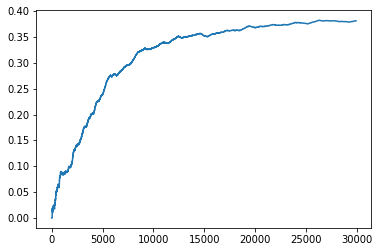

In [12]:
plt.plot(range(EPISODE_COUNT - MEAN_COUNT), mean_rewards)